# Risk factor model

### libraries

In [1]:
import pandas_datareader # package for financial Datasets
import matplotlib.pyplot as plt # importing matplotlib for graphs
import pandas as pd
import yfinance as yf
yf.pdr_override()

In [2]:
pandas_datareader.famafrench.get_available_datasets() # get data from online research library - return of commun risk factors

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
# when to start dataset
start='1926-01-01' # chosing firts possible date

ff= pandas_datareader.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read() #monthly data to decrease noise

In [4]:
# display data to see what we got 
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2022-06   -8.43  2.09 -5.97  0.06
 2022-07    9.57  2.81 -4.10  0.08
 2022-08   -3.77  1.39  0.31  0.19
 2022-09   -9.35 -0.82  0.03  0.19
 2022-10    7.83  0.10  8.06  0.23
 
 [1156 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2017   21.51  -4.97 -13.51  0.80
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.10 -10.34  2.15
 2020   23.66  13.17 -46.57  0.45
 2021   23.56  -3.92  25.57  0.04
 
 [95 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [5]:
# Separating the dataframe for analysis

ff_df=ff[0]
ff_df.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31


### explanation for the columns 
- Mkt-RF = market - risk free rate
- SMB = small minus big
- HML = high minus low
- RF = risk free rate

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

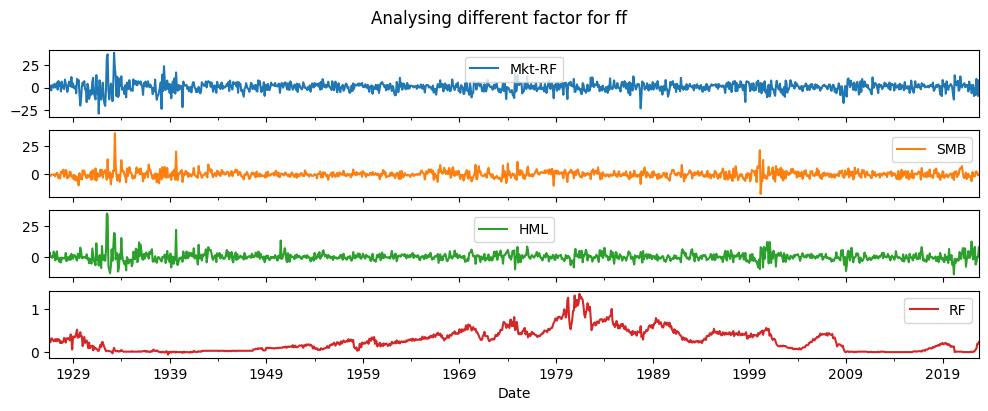

In [6]:
ff_df.plot(subplots=True, figsize=(12,4), title="Analysing different factor for ff") # plotting all df columns 


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

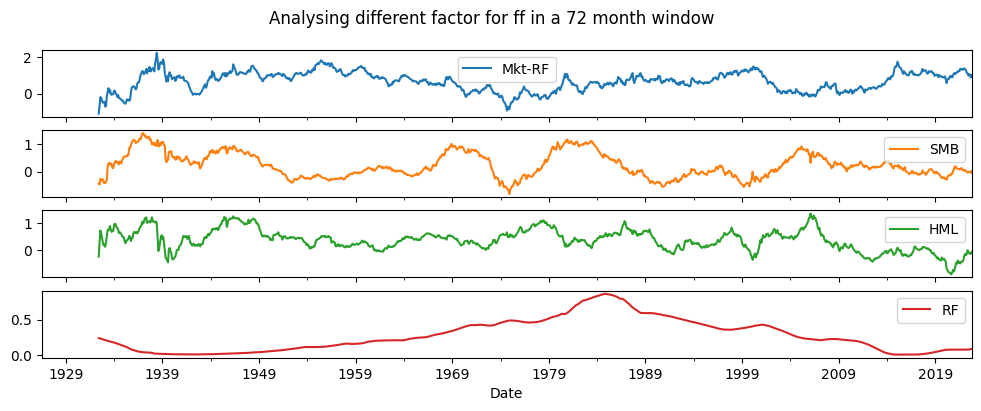

In [7]:
# It is possible to do the mean of a 72 month window
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,4), title="Analysing different factor for ff in a 72 month window")


In [8]:
# Loading another DF for the momentum 
ff_mom_df= pandas_datareader.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq='M', start=start).read()[0]
ff_mom_df.head()

,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00


<AxesSubplot: title={'center': 'Analysing different momentum factor for ff in a 72 month window'}, xlabel='Date'>

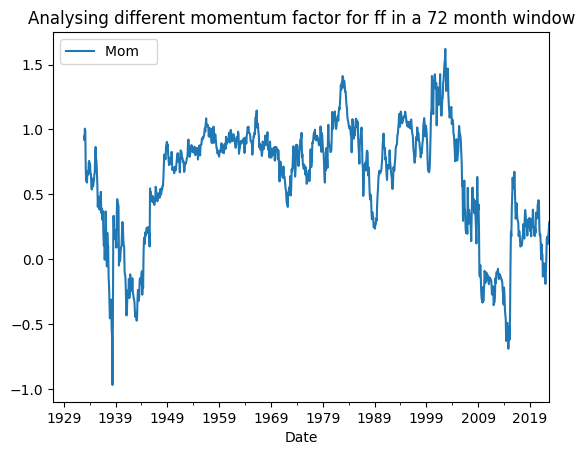

In [9]:
ff_mom_df.rolling(72).mean().plot( title="Analysing different momentum factor for ff in a 72 month window")


### Merging the dataframes

The point here is to merge both dataframes - we can do it using the dates

In [10]:
ff_merge_df= pd.merge(ff_df, ff_mom_df,how='inner',on='Date', sort= True, copy=True, indicator= False, validate='one_to_one') # inner = dates match (they do not start in the same date)

ff_merge_df.head() # view of the df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00


### How to get the risk asset

we have the factor returns for the risk factor - we what the data of the risk asset to regress!
We here chose the APPLE stock

In [11]:

APPLE_df = pandas_datareader.data.get_data_yahoo('AAPL', start=start)['Adj Close'].resample('M').ffill().pct_change().to_frame()

[*********************100%***********************]  1 of 1 completed


In [12]:
APPLE_df.head()

,Adj Close
Date,
1980-12-31,NaN
1981-01-31,-0.172163
1981-02-28,-0.061943
1981-03-31,-0.075475
1981-04-30,0.158163


There is a difference in the date in both dataframes, we must change the date formate in the indexes 

In [13]:
APPLE_df['str_date'] = APPLE_df.index.astype(str) # write index as string
APPLE_df['dt_date'] = pd.to_datetime(APPLE_df['str_date']).dt.strftime('%Y-%m') # change the format
APPLE_df.set_index(['dt_date'], drop=True, append=False, inplace=True, verify_integrity=False) # set date as index
APPLE_df.drop(['str_date'],axis=1, inplace=True) # drop the unnecessary column 


ff_merge_df['str_date'] = ff_merge_df.index.astype(str)
ff_merge_df['dt_date'] = pd.to_datetime(ff_merge_df['str_date']).dt.strftime('%Y-%m')
ff_merge_df.set_index(['dt_date'], drop=True, append=False, inplace=True, verify_integrity=False)
ff_merge_df.drop(['str_date'], axis=1, inplace=True)

In [14]:
apple_ff_df = pd.merge(APPLE_df, ff_merge_df, how='inner', on = 'dt_date', sort=True, indicator=False, copy=True, validate='one_to_one')
apple_ff_df.rename(columns={'Adj Close':'Apple Ret','Mom   ':'Mom' }, inplace=True)
apple_ff_df.head()


,Apple Ret,Mkt-RF,SMB,HML,RF,Mom
dt_date,,,,,,
1980-12,NaN,-4.52,-0.26,2.79,1.31,-6.68
1981-01,-0.172163,-5.04,2.92,6.72,1.04,-7.95
1981-02,-0.061943,0.57,-0.34,1.02,1.07,-1.35
1981-03,-0.075475,3.56,3.54,0.64,1.21,0.74
1981-04,0.158163,-2.11,4.40,2.28,1.08,-0.91


In [15]:
# AAP return is not in percentage - the units are off
# we can create a new column to the net apple return (apple return - risk free rate)

apple_ff_df['AAP_RF']=apple_ff_df['Apple Ret']*100 - apple_ff_df['RF']
apple_ff_df.head()

,Apple Ret,Mkt-RF,SMB,HML,RF,Mom,AAP_RF
dt_date,,,,,,,
1980-12,NaN,-4.52,-0.26,2.79,1.31,-6.68,NaN
1981-01,-0.172163,-5.04,2.92,6.72,1.04,-7.95,-18.256311
1981-02,-0.061943,0.57,-0.34,1.02,1.07,-1.35,-7.264308
1981-03,-0.075475,3.56,3.54,0.64,1.21,0.74,-8.757510
1981-04,0.158163,-2.11,4.40,2.28,1.08,-0.91,14.736263


In [19]:
# Drop Nan values - they are bad for regression

apple_ff_df.dropna(axis=0,inplace=True)
apple_ff_df.drop(['Apple Ret'], axis=1, inplace=True)
apple_ff_df.head()

,Mkt-RF,SMB,HML,RF,Mom,AAP_RF
dt_date,,,,,,
1981-01,-5.04,2.92,6.72,1.04,-7.95,-18.256311
1981-02,0.57,-0.34,1.02,1.07,-1.35,-7.264308
1981-03,3.56,3.54,0.64,1.21,0.74,-8.757510
1981-04,-2.11,4.40,2.28,1.08,-0.91,14.736263
1981-05,0.11,2.00,-0.42,1.15,3.70,15.589832


### starting regression

In [17]:
# import OLS library
from statsmodels.api import OLS

In [25]:
results = OLS(apple_ff_df['AAP_RF'], apple_ff_df[['Mkt-RF', 'SMB', 'HML', 'Mom']], missing = "drop").fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 AAP_RF   R-squared (uncentered):                   0.290
Model:                            OLS   Adj. R-squared (uncentered):              0.284
Method:                 Least Squares   F-statistic:                              50.84
Date:                Sat, 17 Dec 2022   Prob (F-statistic):                    6.81e-36
Time:                        08:26:44   Log-Likelihood:                         -1916.5
No. Observations:                 502   AIC:                                      3841.
Df Residuals:                     498   BIC:                                      3858.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2767      0.115     11.069      0.000       1.050       1.503
SMB            0.2243      0.173      1.294      0.196      -0.116       0.565
HML           -0.8232      0.168     -4.912      0.000      -1.153      -0.494
Mom           -0.0490      0.118     -0.417      0.677      -0.280       0.182
==============================================================================
Omnibus:                       14.905   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.681
Skew:                          -0.063   Prob(JB):                     2.18e-07
Kurtosis:                       4.205   Cond. No.                         1.87
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we did not see the alpha coef, we must fix it
we can add a column of ones to create the constant in the model

In [28]:
import statsmodels

apple_ff_df_one=statsmodels.tools.add_constant(apple_ff_df, prepend=True)
apple_ff_df_one.head()

,const,Mkt-RF,SMB,HML,RF,Mom,AAP_RF
dt_date,,,,,,,
1981-01,1.0,-5.04,2.92,6.72,1.04,-7.95,-18.256311
1981-02,1.0,0.57,-0.34,1.02,1.07,-1.35,-7.264308
1981-03,1.0,3.56,3.54,0.64,1.21,0.74,-8.757510
1981-04,1.0,-2.11,4.40,2.28,1.08,-0.91,14.736263
1981-05,1.0,0.11,2.00,-0.42,1.15,3.70,15.589832


In [29]:
results = OLS(apple_ff_df_one['AAP_RF'], apple_ff_df_one[['const','Mkt-RF', 'SMB', 'HML', 'Mom']], missing = "drop").fit() # with coeficient
results.summary() # new results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AAP_RF   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     49.66
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           3.73e-35
Time:                        08:31:18   Log-Likelihood:                -1912.2
No. Observations:                 502   AIC:                             3834.
Df Residuals:                     497   BIC:                             3856.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4738      0.507      2.904      0.004       0.477       2.471
Mkt-RF         1.2088      0.117     10.346      0.000       0.979       1.438
SMB            0.2165      0.172      1.258      0.209      -0.122       0.555
HML           -0.9043      0.169     -5.362      0.000      -1.236      -0.573
Mom           -0.1125      0.119     -0.948      0.344      -0.346       0.121
==============================================================================
Omnibus:                       14.116   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               28.225
Skew:                          -0.060   Prob(JB):                     7.43e-07
Kurtosis:                       4.155   Cond. No.                         5.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""